Η παρακάτω αναφορά έγινε με την επιμέλεια των φοιτητών Κριθαρούλα Αναστασίας με αριθμό μητρώου 03117073 και Κριθαρούλα Διονύση με αριθμό μητρώου 03117875.

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αναγνώριση ψηφίων από εικόνα στο dataset MNIST. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα pixels της κάθε εικόνας και $y_i$ είναι η ετικέτα της εικόνας - ένας ακέραιος στο $[0,9]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,9]}$$

## 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα υλοποιηθούν στα επόμενα μέρη.

## 2ο Μέρος: ΚΝΝ
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται μια "φρέσκια" εικόνα ως διάνυσμα από pixels $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστιχεί στα pixels μιας εικόνας από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στις 100 πρώτες εικόνες του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 1ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

## 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean, δηλαδή παίρνουν δύο τιμές
  - Για το συγκεκριμένο πρόβλημα μπορούμε να στρογγυλοποιήσουμε τις τιμές των pixels από το $[0.0,1.0]\rightarrow{\{0,1\}}$
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηρστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

## 4ο Μέρος: Perceptron

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τις εικόνες του mnist σε μια από τις 10 διαφορετικές κλάσεις (από 0 μέχρι 9). Αρχικά θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου.  

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x)είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδος του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε σε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

# 1ο Μέρος: Αξιολόγηση

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές στη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong) και υπολογίζει και τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένα}$$



In [1]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self,y_true,y_pred,x):
        self.y_true = y_true
        self.y_pred = y_pred
        self.x = x

    def my_accuracy(self):
        y_true = self.y_true
        y_pred = self.y_pred
      
        acc = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                acc = acc + 1
                
        acc = acc / len(y_true)
        
        return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision" : precision, "recall": recall, "f1": f1,"accuracy":self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_sample_of_wrong(self, rows = 5, lines = 4):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        plt.figure(figsize=(10, 10))

        random.shuffle(wrong_indexes)
        for i, index in enumerate(wrong_indexes[: rows*lines]):
            plt.subplot(rows, lines, i + 1)
            image = self.x[index]
            plt.imshow(image.reshape((28, 28)))
            plt.title("Real: {}, Pred: {}".format(self.y_true[index], self.y_pred[index]))
            plt.axis('off')

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m+' : '+str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)
        print("Some images with wrong predictions")
        self.get_sample_of_wrong()

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν οι εικόνες από το dataset

precision : 0.7000000000000001
recall : 0.6944444444444443
f1 : 0.6888888888888888
accuracy : 0.625
Confusion matrix: 
[[3 1 0]
 [2 1 0]
 [0 0 1]]
Some images with wrong predictions


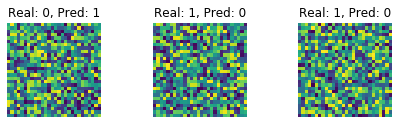

In [2]:
y_true = [1,0,2,0,0,1,1,0]
y_pred = [0,0,2,0,1,1,0,0]
x = np.random.rand(8,28*28)

eval = Evaluate(y_true,y_pred,x)
eval.get_evaluation_report()

# Dataset

To MNIST είναι από τα πιο διαδεδομένα σύνολα δεδομένων στη μηχανική μάθηση. Για όσους δουλεύουν στο Google Colab, το κελί που ακολουθεί φορτώνει τα δεδομένα εκπαίδευσης σε έναν πίνακα x_train με τις ετικέτες των δεδομένων στη λίστα y_train, και τα testing δεδομένα αντίστοιχα στα x_test και y_test.


Για όσους δεν δουλεύουν στο colab μπορούν να αντικαταστήσουν τις δύο πρώτες γραμμές του κελιού (train_dset = ... και test_dset = ... ) με τον παρακάτω κώδικα:
```
mnist_dataframe = pd.read_csv(
  "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",
  sep=",",
  header=None)
mnist_dataframe = mnist_dataframe.head(10000)

mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
train_dset = mnist_dataframe[:7500]
test_dset = mnist_dataframe[7500:10000]
```

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_dset = pd.read_csv('mnist_train_small.csv',header=None)
test_dset = pd.read_csv('mnist_test.csv',header=None)
## From https://colab.research.google.com/notebooks/mlcc/multi-class_classification_of_handwritten_digits.ipynb#scrollTo=JfFWWvMWDFrR
def parse_labels_and_features(dataset):
    """Extracts labels and features.
  
    This is a good place to scale or transform the features if needed.
  
    Args:
      dataset: A Pandas `Dataframe`, containing the label on the first column and
        monochrome pixel values on the remaining columns, in row major order.
    Returns:
      A `tuple` `(labels, features)`:
        labels: A Pandas `Series`.
        features: A Pandas `DataFrame`.
    """
    labels = dataset[0]

    # DataFrame.loc index ranges are inclusive at both ends.
    features = dataset.loc[:,1:784]
    # Scale the data to [0, 1] by dividing out the max value, 255.
    features = features / 255

    return labels, np.array(features)

def show_image(features):
    img = features.reshape((28,28))
    plt.imshow(img)
    plt.show()

y_train,x_train = parse_labels_and_features(train_dset)
y_test,x_test = parse_labels_and_features(test_dset)

<i> <b> Σχόλιο: </b>
    
Για τη συγκεκριμένη εργασία δουλέψαμε τοπικά στον υπολογιστή μας. Για το σκοπό αυτό στο ίδιο directory με το τρέχον ipynb αρχείο είχαμε τοποθετημένα και τα αρχεία 'mnist_train_small.csv' και 'mnist_test.csv'.

Ποια είναι η μορφή των δεδομένων για μια εικόνα;

In [4]:
print("Shape of an image: "+str(x_train[0].shape))
print("Max value of pixel: "+str(np.max(x_train[0])))

Shape of an image: (784,)
Max value of pixel: 1.0


Φορτώνουμε μια τυχαία εικόνα και την εμφανίζουμε, μαζί με την ετικέτα της

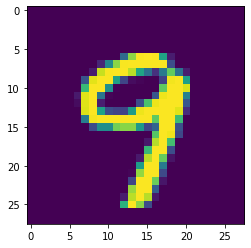

Label = 9


In [5]:
i = np.random.randint(0,x_train.shape[0])
show_image(x_train[i])
print("Label = " +str(y_train[i]))

<i> <b> Σχόλιο: </b>
    
Παρατηρούμε ότι κάθε εικόνα του train και test set αναπαιστάται από ένα διάνυσμα 784 στοιχείων, όπου κάθε ένα από τα στοιχεία αυτά αντιστοιχεί και σε ένα pixel της που παίρνει τιμές στο διάτημα [0, 1]

# 2o Μέρος: Υλοποίηση KNN

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [6]:
## Simple KNN

class KNN:
    def __init__(self,x,y,k,distance="euclidian"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
  
  
    ## Compute the distance between the two vectors img1 and img2
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self,img1,img2):
        if self.distance=='euclidian':
            
            dist = np.linalg.norm(img1 - img2)

        elif self.distance=='cosine':
            
            norm_1 = np.linalg.norm(img1)
            norm_2 = np.linalg.norm(img2)
            dist = 1 - np.dot(img1, img2) / (norm_1 * norm_2)

        return dist


    ## Given an image as a vector, returns indexes of k nearest neighbors
    def get_knn(self,img):
        distances = list()
        x = self.x
        k = self.k
    
        for current_img in x:
            distances.append(self.get_distance(img, current_img))

        # Sort distances, and return the indexes of k first elements
        ans_indexes = np.argsort(distances)[:k]

        return ans_indexes


    ## Given an image as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self,img):
        y = self.y
        
        nn_labels = [y[i] for i in self.get_knn(img)]

        prediction = max(set(nn_labels), key = nn_labels.count)

        return prediction
    
knn = KNN(x_train, y_train, k = 5 , distance='euclidian')    

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονομένες εικόνες

Input image: 


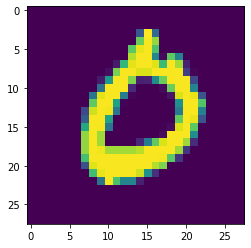

Prediction : 0


In [7]:
img = x_test[np.random.randint(0,x_test.shape[0])]
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))

## Αξιολόγηση του KNN

Ο παραπάνω ταξινομητής k νοτινότερων γειτόνων που υλοποιήσαμε, επιλέγει σε ποιά από τις κλάσεις 0 έως 9 θα ενταχθεί μια εικόνα με βάση τις κλάσεις στις οποίες ταξινομούνται οι k κοντινότεροι "γείτονες" αυτής. Πιο αναλυτικά, μια εικόνα θα ενταχθεί στην κλάση στην οποία ανήκουν και οι περισσότεροι από τους k γείτονες αυτής. Τους κοντινότερους γείτονες μιας εικόνας (ενός διανύσματος 784 στοιχείων) τους εντοπίζουμε είτε με χρήση της ευκλείδιας απόστασης μεταξύ δύο διανυσμάτων είτε με χρήση της απόστασης συνημιτόνου μεταξύ δύο διανυσμάτων. 

Θα κατασκευάσουμε και έπειτα θα αξιολογήσουμε ταξινομητές για k = 1, 3, 5 και 10 κοντινότερους γείτονες για τον υπολογισμό των οποίων χρησιμοποιούν τόσο την ευκλείδια απόσταση όσο και την απόσταση συνημιτόνου, τόσο με βάση τις μετρικές όσο και με βάση τη χρόνο εκτέλεσής τους και τηνυπολογιστική τους πολυπλοκότητα. 

### Ταξινομητής ΚΝΝ με k = 1 κοντινότερο γείτονα

- Euclidean Distance

Αρχικά, εκπαιδεύουμε τον ταξινομητή ΚΝΝ για έναν κοντινότερο γείτονα, ο οποίος χρησιμοποιεί την ευκλείδια απόσταση και στη συνέχεια, δοκιμάζουμε την επίδοση αυτού πάνω στις 100 πρώτες εικόνες του test set που μας έχει δοθεί. 

In [8]:
%%time

knn_1_euclidean = KNN(x_train, y_train, k = 1 , distance ='euclidian')
preds = [knn_1_euclidean.classify(x_test[i]) for i in range(100)]

Wall time: 46.9 s


In [9]:
labels = [y_test[i] for i in range(100)]

precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


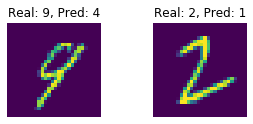

In [10]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

- Cosine Distance

In [11]:
%%time

knn_1_cosine = KNN(x_train, y_train, k = 1 , distance='cosine')
preds = [knn_1_cosine.classify(x_test[i]) for i in range(100)]

Wall time: 1min 16s


In [12]:
labels = [y_test[i] for i in range(100)]

In [13]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

precision : 1.0
recall : 1.0
f1 : 1.0
accuracy : 1.0
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


<Figure size 720x720 with 0 Axes>

### Ταξινομητής KNN με k = 3 κοντινότερους γείτονες

- Euclidean Distance

In [14]:
%%time

knn_3_euclidean = KNN(x_train, y_train, k = 3 , distance='euclidian')
preds = [knn_3_euclidean.classify(x_test[i]) for i in range(100)]

Wall time: 42.8 s


In [15]:
labels = [y_test[i] for i in range(100)]

precision : 0.9775162337662338
recall : 0.9712662337662337
f1 : 0.9738737606479541
accuracy : 0.97
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


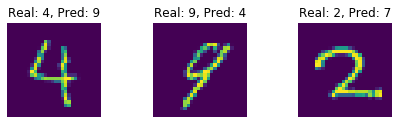

In [16]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

- Cosine Distance

In [17]:
%%time

knn_3_cosine = KNN(x_train, y_train, k = 3 , distance='cosine')
preds = [knn_3_cosine.classify(x_test[i]) for i in range(100)]

Wall time: 1min 24s


In [18]:
labels = [y_test[i] for i in range(100)]

precision : 0.9888888888888889
recall : 0.9928571428571429
f1 : 0.9904139433551198
accuracy : 0.99
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


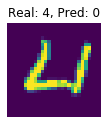

In [19]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

### Ταξινομητής ΚΝΝ με k = 5 κοντινότερους γείτονες

- Euclidean Distance

In [20]:
%%time

knn_5_euclidean = KNN(x_train, y_train, k = 5 , distance='euclidian')
preds = [knn_5_euclidean.classify(x_test[i]) for i in range(100)]

Wall time: 47.3 s


In [21]:
labels = [y_test[i] for i in range(100)]

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


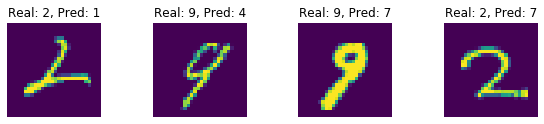

In [22]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

- Cosine Distance

In [23]:
%%time

knn_5_cosine = KNN(x_train, y_train, k = 5 , distance='cosine')
preds = [knn_5_cosine.classify(x_test[i]) for i in range(100)]

Wall time: 1min 23s


In [24]:
labels = [y_test[i] for i in range(100)]

precision : 0.9888888888888889
recall : 0.9928571428571429
f1 : 0.9904139433551198
accuracy : 0.99
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


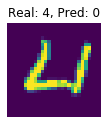

In [25]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Ο classifier της βιβλιοθήκης sklearn που χρησιμοποιούμε παρακάτω χρησιμοποιοεί την ευκλείδια απόσταση μεταξύ διανυσμάτων προκειμένου να υπολογίσει την απόσταση των εικόνων (διανυσμάτων) μεταξύ τους.

#### Έτοιμος ΚΝΝ classifier για k = 1

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
%%time
k = 1
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

Wall time: 11.6 s


precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


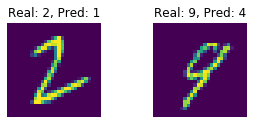

In [28]:
eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

#### Έτοιμος KNN classifier για k = 3

In [29]:
%%time
k = 3
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

Wall time: 12.2 s


precision : 0.9775162337662338
recall : 0.9712662337662337
f1 : 0.9738737606479541
accuracy : 0.97
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


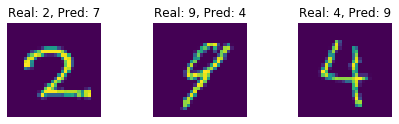

In [30]:
eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

#### Έτοιμος ΚΝΝ classifier για k = 5

In [31]:
%%time
k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

Wall time: 13.8 s


precision : 0.9888888888888889
recall : 0.9928571428571429
f1 : 0.9904139433551198
accuracy : 0.99
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


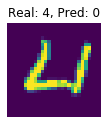

In [32]:

eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

<b> Παρατήρηση: </b>
    
Παρατηρούμε ότι ο έτοιμος KNN classifier, ο οποίος και χρησιμοποιεί ως μετρική για τον υπολογισμό των αποστάσεων μεταξύ των εικόνων την ευκλείδια απόσταση, έχει το ίδιο ποσοστό επιτυχίας ταξινομήσεων με τη δική μας υλοποίηση για τον ταξινομητή KNN με χρήση ευκλείδιας απόστασης, για το ίδιο k, όπως και ήταν αναμενόμενο.

## Σχολιασμος και Σύκγριση υλοποιήσεων

### Επίδοση ταξινομητών ως προς το ποσοστό επιτυχίας των ταξινομήσεών τους

Παραπάνω υλοποιήσαμε έναν ταξινομητή ΚΝΝ χρησιμοποιώντας k = 1, 3 ή 5 κοντινότερους γείτονες σε συνδυασμό με την ευκλείδια ή την απόσταση συνημιτόνου. Κάθε μια από τις υλοποιήσεις αυτές την τρέχουμε πάνω στο δοθέν test set, όπου και την αξιολογούμε με βάση τις μετρικές pression, recall και accuracy. 
- Η μετρική <b> precission </b> εκφράζει το λόγο του πλήθους των εικόνων που ταξινομήθηκαν σωστά σε μια κλάση, έστω i, προς το πλήθος των εικόνων που ταξινομήθηκαν σε αυτήν. Οπότε, πρακτικά μια μικρή τιμή στη μετρική precission ισοδυναμεί με αβεβαιότητα στον ταξινομητή μας, ενώ μια μεγαλύτερη προσδίδει μεγαλύτερη ακρίβεια στις επιλογές του, δηλαδή αυξάνει την πιθανότητα μια τυχαία εικόνα που έχει ταξινομηθεί στης κλάση i να αναπαριστά πράγματι τον αριθμό i.
- Η μετρική <b> recall </b> εκφράζει το λόγο του πλήθους των εικόνων που ταξινομήθηκαν σωστά σε μια κλάση, έστω i, προς το πλήθος των εικόνων που θα έπρεπε συνολικά να έχουν ταξινoμηθεί σε αυτή.Οπότε, μεγάλη τιμή recall αντιστοιχεί σε μεγάλη πιθανότητα μια εικόνα που αναπαριστά τον αριθμό i να έχει ταξινομηθεί πράγματι στην κλάση i. 
- Η μετρική <b> f1 </b> αποτελεί έναν μέσο όρο των δύο παραπάνω συναρτήσεων, έτσι ώστε να διατηρείται μια ισορροπία μεταξύ τους.
- Η μετρική <b> accuracy </b> εκφράζει το πλήθος των εικόνων που ταξινομήθηκαν σωστά στην αντίστοιχη κλάση τους, προς το συνολικό πλήθος των εικόνων, δείχνει δηλαδή το ποσοστό των επιτυχημένων ταξινμήσεων πάνω στο σύνολο των ταξινομήσεων του εκάστοτε ταξινομητή.
Παρατηρούμε λοιπόν, ότι έναν "καλός" ταξινομητής θα πρέπει να χαρακτηρίζεται από υψηλές τιμές στις παραπάνω μετρικές.

Με βάση αυτά παρατηρούμε ότι όλοι οι ταξινομητές που υλοποιήσαμε παραπάνω είναι αρκετά καλοί, καθώς ταξινομούν τις εικόνες σωστάσε ποσοστό πάνω από 96% (accuracy). <b> Καλύτερη υλοποίηση φαίνεται να είναι η υλοποίηση του ταξινομητή ενός κοντινότερου γείτονα που χρησιμοποιεί την απόσταση συνημιτόνου για τον υπολογισμό των αποστάσεων μεταξύ των εικόνων </b>. Ο ταξινομητής αυτός φαίνεται να επιτυγχάνει το απόλυτο ποσοστό επιτυχίας τουλάχιστον στο αρκετά μικρό data set στο οποίο δοκιμάστηκε (100 πρώτες εικόνες του test set).

Ας δούμε ωστόσο, λίγο πιο αναλυτικά την επίδραση της τιμής k, όσο και της απόστασης στην επίδοση ενός ΚΝΝ ταξινομητή στο συγκεκριμένο πρόβλημα ταξινόμησης των εικόνων με βάση των αριθμό που αναπαριστούν. 

- Όσον αφορά το πλήθος των γειτόνων k:

Στο συγκεκριμένο πρόβλημα ταξινόμησης και για το συγκεκριμένο data set παρατηρούμε ότι όσο μικρότερος είναι ο αριθμός k των γετόνων που "συμβουλεύεται" ο ταξινομητής προκειμένου να "αποφασίσει" ποιον αριθμό αναπαριστά η εικόνα ώστε να την ταξινομήσει στην αντίστοιχη κλάση τόσο καλύτερη είναι και η επίδοσή του. Αυτό γιατί η γραφική αναπαράσταση ενός συγκεκριμένου αριθμού δεν επιδέχεται και μεγάλης ανοχής. Σε όλον τον κόσμο η αναπαράσταση των αριθμών είναι η ίδια και οι διαφοροποιήσεις μεταξύ των αναπαραστάσεων του ίδιου αριθμού έγγυνται στο γραφικό χαρακτήρα του εκάστοτε ανθρώπου χωρίς ωστόσο να μπορούν και πάλι να αποκλίνουν πολύ. Λόγω της φύσης του προβλήματος λοιπόν είναι λογικό μια εικόνα που βρίσκεται πολύ κοντά στην εικόνα που ο ταξινομητής καλείται να ταξινομήσει (έχουν φωτισμένα σχεδόν τα ίδια pixel) να ανπαριστά και τον ίδιο αριθμό. Παράλληλα, στη μικρή αυτή τιμή του k για την καλύτερη επίδοση συμβάλλει αρκετά και το γεγονός ότι έχουμε εκπαιδεύσει τους ταξινομητές μας πάνω σε ένα σχετικά μικρό data set, οπότε και δε μπορούμε να βασιστούμε σε μεγάλο αριθμό γειτόνων καθώς αναλογικά με το μέγεθος του data set είναι σαν να "απομακρυνόμαστε" αρκετά από τη θέση της εικόνας που θέλουμε να ταξινομήσουμε. Ωστόσο, αυτό δεν ισχύει σε όλα τα προβλήματα ταξινόμησης που καλούμαστε να αντιμετωπίσουμε στην πράξη. Στα περισσότερα πρακτικά προβλήματα είναι αρκετά πιθανό ένα δείγμα στο data set να έχει παρεκλείνει λίγο ή και περισσότερο από το χώρο που πραγματικά βλέπουμε να συγκεντρώνεται η πλειοψηφία των δείγματων που ανήκουν στη ίδια κλάση με αυτό. Το πρόβλημα αυτό ενισχύεται ακόμα περισσότερο εάν οι διαφορετικές κλάσεις στις οποίες καλούμαστε να εκπαιδεύσουμε το ταξινομητή μας "συνορεύουν" αρκετά μεταξύ τους. Για το λόγο αυτό γενικά η τιμή του k θα πρέπει να επιλέγεται ως εξής:
  - να είναι αρκετά μεγάλο ώστε να ελαχιστοποιεί την πιθανότητα εσφαλμένης ταξινόμησης (ιδίως όταν έχουμε κλάσεις που συνορεύουν)
  - αρκετά μικρό (συγκριτικά με το μέγεθος του data set) έτσι ώστε οι γείτονες που θα επιλεχθούν να είναι αρκετά κοντά στο προς ταξινόμηση δείγμα για να δώσουν μια ακριβή εκτίμηση της κλάσης στην οποία αυτό ανήκει.
  
<b> Πρακτικά, στο συγκεκριμένο πρόβλημα λοιπόν, έχουμε σχετικά ευδιάκριτες κλάσεις που δε συνορεύουν μεταξύ τους (οι αναπαραστάσεις διαφορετικών αριθμών κατά πλειοψηφία διαφέρουν αρκετά μεταξύ τους), ενώ παράλληλα έχουμε και ένα μικρό μέγεθος train set, οπότε και μικρή τιμή του k αποτελεί την καλύτερη επιλογή. </b>   

- Όσον αφορά την επιλογή της συνάρτησης που υπολογίζει την απόσταση μεταξύ των εικόνων:

Παρατηρούμε ότι <b> η επιλογή της απόστασης συνημιτόνου σε σύγκριση με την ευκλείδια απόσταση επιφέρει μεγαλύτερο ποσοστό επιτυχημένων ταξινομήσεων σε ΚΝΝ ταξινομητές με ίδιο k </b>. Αυτό ίσως οφείλεται στο γεγονός ότι η απόσταση συνημιτόνου δε λαμβάνει υπόψην της το πλάτος των διανυσμάτων, παρά μόνο την γωνία που αυτά τα δύο σχηματίζουν μεταξύ τους. Οπότε, για πράδειγμα στην περίπτωση που έχουμε δύο εικόνες με σχεδόν την ίδια αναπαράσταση που ωστόσο στη μια τα pixel είναι πιο "έντονα χρωματισμένα" και στην άλλη πιο αχνά, η ευκλείδια μετρική θα αποδόσει σε αυτές μεγαλύτερη απόσταση συγκριτικά με την απόσταση που θα απέδιδε στις ίδιες ακριβώς εικόνες εάν τα pixel είχαν την ίδια τονικότητα. Αντίθετα, η απόσταση συνημιτονου θα απέδιδε και στις δύο περιπτώσεις την ίδια απόσταση μεταξύ των δύο εικόνων.    

### Επίδοση των ταξινομητών ως προς τις χρονικές απαιτήσεις τους

Παρατηρούμε γενικά ότι <b> η υλοποιήση ο ταξινομητής ΚΝΝ έχει υψηλές χρονικές απαιτήσεις </b>, όχι τόσο κατά την εκπαίδευση του που απλά αποθηκεύει όλο το train set με τις αντίστοιχες ετικέτες αλλά κυρίως όταν εκτελεί την πρόβλεψη του και την ταξινόμηση μιας εικόνας σε μια συγκεκριμένη κλάση. Αυτό γιατί κάθε φορά που καλείται να ταξινομήσει μια εικόνα πρέπει να διασχίσει όλο το data set που έχει αποθηκευμένο, να υπολογίσει την απόσταση της τρέχουσας εικόνας από κάθε εικόνα μέσα σε αυτό και τελικά να εντοπίσει τους k κοντινότερους γείτονες της, το οποίο προφανώς είναι υπολογιστικά πολύ ακριβό. Αρκεί να παρατηρήσουμε ότι ηέτοιμη υλοποίηση της βιβλιοθήκης sklearn απαιτεί χρόνο 10 sec προκειμένου να ταξινομήσει μόνο τις πρώτες 100 εικόνες του test set. Ακόμα περισσότερο χρόνο απιαιτούν για το ίδιο πλήθος test δειγμάτων οι δικές πολύ πιο απλές υλοποιήσεις. Ένας τρόπος να μειώσουμε τον υπολογιστικό αυτό χρόνο είναι να περιορίσουμε το data set το οποίο κάθε φορά καλείται να διατρέξει ο ταξινομητής προκειμένου να ταξινομήσει μια εικόνα. Αυτό μπορούμε να το επιτύχουμε επιλέγοντας να αποθηκεύσουμε στον ταξινομητή κατά την εκπαίδευσή του κατάλληλους αντιπροσώπους για κάθε μια από τις κλάσεις του, οπότε και στη συνέχεια κάθε φορά που καλείται να ταξινομήσει μια εικόνα θα ανζητά κοντινότερους γείτονες για αυτήν μεταξύ των αντιπροσώπων αυτών, και όχι ολόκληρου του data set.    

Ένας ακόμα τρόπος να μειώσουμε το χρόνο που απαιτείται για την ταξινόμηση από τον ΚΝΝ ταξινομητή είναι να περιορίσουμε την αναπαράσταση των εικόνων του train και του test set έτσι ώστε κάθε φορά που θέλουμε να υπολογίσουμε την απόσταση μεταξύ τους να μπορούμε να το επιτυγχάνουμε πολύ γρηγορότερα. Για το σκοπό αυτό <b> αναπαριστούμε αρχικά κάθε εικόνα του train και του test set ως τη μέση τιμή του διανύσματος των χαρακτηριστικών της </b>, οπότε και εκπαιδεύουμε τον ΚΝΝ classifier με βάση το νέο τροποποιημένο train set και στη συνέχεια τον αξιολογούμε πάνω στο νέο τροποποιημένο test set.

In [33]:
x_train_m = [np.array([x]) for x in np.mean(x_train, axis = 1)]
x_test_m = [np.array([x]) for x in np.mean(x_test, axis = 1)]

In [34]:
%%time

knn_m = KNN(x_train_m, y_train, k = 5)
preds = [knn_m.classify(x_test_m[i]) for i in range(100)]

Wall time: 15.1 s


In [35]:
labels = [y_test[i] for i in range(100)]
eval = Evaluate(y_test[:100],y_pred,x_test_m[:100])
metrics = eval.get_metrics()
for m in metrics:
    print(m+' : '+str(metrics[m]))

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96


Παρατηρούμε ότι ο νέος ΚΝΝ ταξινομητής απαιτεί αισθητά μικρότερο χρόνο προκειμένου να ταξινομήσει τις πρώτες 100 εικόνες του test set, συγκριτικά με πριν. Ωστόσο, αναπαριστώντας τις εικόνες με τη μέση τιμή του διανύσματος των χαρακτηριστικών τυος παρατηρούμε ότι μειώνεται και το accuracy του ταξινομητή. Βέβαια, παρόλα αυτά παραμένει σε μια αρκετά υψηλή τιμή 0.8, οπότε ίσως ο συμβιβασμός αυτός να συμφέρει ιδίως όταν σε περιπτώσεις που έχουμε πολύ μεγαλύτερα data sets.  

# 3ο Μέρος: Naive Bayes

Αρχικά στρογγυλοποιούμε τις τιμές των pixels για να παίρνουν διακριτές τιμές στο $\{0,1\}$

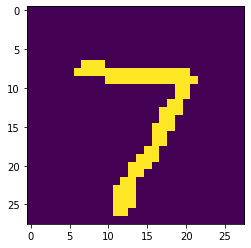

In [36]:
## Στρογγυλοποίηση:
x_train_r = np.round(x_train)
x_test_r = np.round(x_test)
show_image(x_test_r[0])

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [37]:
class NaiveBayes:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((10,))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1],10))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y:
            self.pC[label]+=1

        for attributes, label in zip(self.x, self.y):
            for i in range(len(attributes)):
                if attributes[i] == 1:
                    self.pxC[i][label] += 1
        
        for label in range(10):
            self.pxC[:, label] = self.pxC[:, label]/self.pC[label]
        
        self.pC = self.pC/self.y.shape[0]

    def predict(self,x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((10,))
        for i in range(10):
            pcX[i] = self.pC[i]
            for k in range(len(x)):
                if x[k] == 1:
                    pcX[i] = pcX[i] * self.pxC[k][i]
                else:
                    pcX[i] = pcX[i] * (1 - self.pxC[k][i])
            
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [38]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

Wall time: 9.05 s


precision : 0.8400974025974026
recall : 0.850108225108225
f1 : 0.8261529454950507
accuracy : 0.85
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  1  0]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 13  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  1  9]]
Some images with wrong predictions


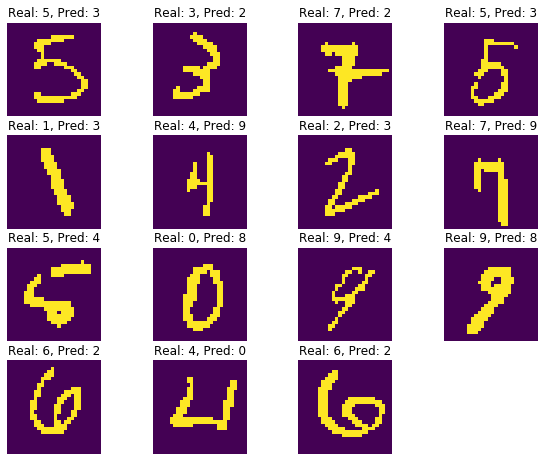

In [39]:
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το SKLearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

Αρχικά, δοκιμάζουμε το σύνολο x_train ως train set για τον έτοιμο Naive Bayes classifier της βιβλιοθήκης sklearn, δηλαδή το σύνολο των δεδομένων εκπαίδευσης που παίρνουν συνεχείς τιμές στο [0, 1], υποθέτοντας ότι κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή.  

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

Wall time: 469 ms


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


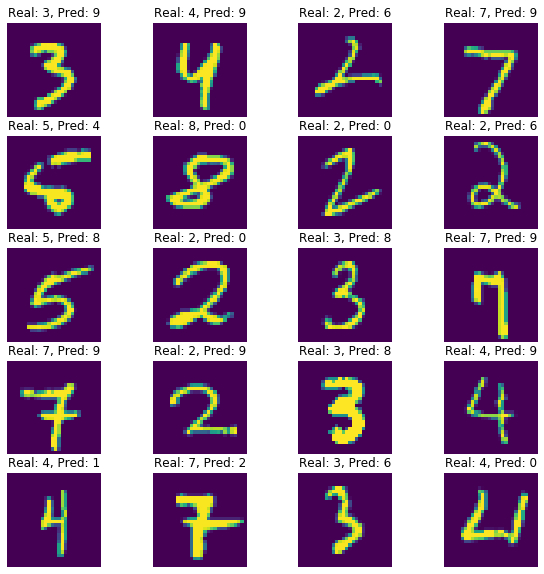

In [42]:
eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

Στη συνέχεια, δοκιμάζουμε να εκπαιδεύσουμε τον ταξινομητή Niave Bayes της βιβλιοθήκης sklearn με το στρογγυλοποιημένο σύνολο δεδομένων, στο οποίο καθένα από τα χαρακτηριστικά παίρνει τιμές στο διακριτό σύνολο {0, 1}. 

In [43]:
from sklearn.naive_bayes import BernoulliNB

In [44]:
%%time
gnb = BernoulliNB()
y_pred = gnb.fit(x_train_r, y_train).predict(x_test[:100])

Wall time: 416 ms


precision : 0.7911499611499612
recall : 0.8163311688311689
f1 : 0.7725889593722411
accuracy : 0.8
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  1  0  1  0  0  1  0]
 [ 0  0  7  1  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0]
 [ 1  0  0  0 11  0  0  0  0  2]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0 12  2  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  3  8]]
Some images with wrong predictions


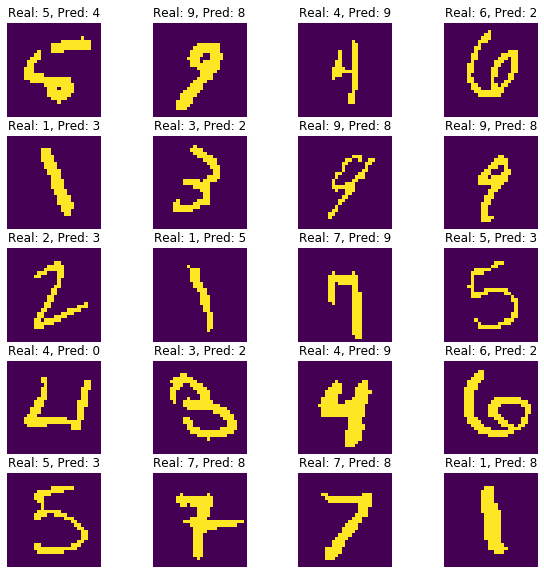

In [45]:
eval = Evaluate(y_test[:100], y_pred, x_test_r[:100])
eval.get_evaluation_report()

## Σχολιασμός και Σύγκριση υλοποιήσεων

### Επίδοση ταξινομητών ως προς το ποσοστό επιτυχίας των ταξινομήσεών τους

Παρατηρούμε ότι τόσο η δική μας υλοποίηση για το Naive Bayes classifier (accuracy: 0.85) όσο και ο έτοιμος Bernoulli Naive Bayes Classifier (accuracy: 0.8) που χρησιμοποιούν τα στρογγυλοποιημένα train και test sets παρουσιάζουν μεγαλύτερο accuracy, δηλαδή ταξινομούν σωστά μεγαλύτερο ποσοστό εικόνων του test set συγκριτικά με τον έτοιμο Gausssian Naive Bayes classifier (accuracy : 0.6) ο οποίος χρησιμοποιεί τα αρχικά train και test sets. Το γεγονός αυτό οδηγεί στο συμπέρασμα ότι <b>η υπόθεση που κάνουμε</b> στο Gaussian Naive Bayes classifier ότι τα χαρακτηριστικά ακολουθούν κανονική κατανομή μάλλον <b>δεν είναι ιδιαίτερα ευσταθής</b>.
Βέβαια, παρατηρούμε ότι το accuacy ακόμα και των δύο υλοποιήσεων με τα διακριτά train και test set είναι πιο μικρό συγκριτικά με τον KNN classifier κατά τουλάχιστον 0.1. Αυτό πιθανόν να οφείλεται στο γεγονός ότι προκειμένου να υλοποιήσουμε τους συγκεκριμένους classifiers <b>στρογγυλοποιήσαμε</b> τα χαρακτηριστικά στις διακριτές τιμές {0, 1} οπότε και περιορίσαμε λίγο την πληροφορία που αυτά μεταφέρουν και εξασφαλίζουν ώστε να εκπαιδευτεί όσο το δυνατόν καλύτερα ο classifier για να ταξινμεί σωστά τις εικόνες. Βέβαια, στο συγκεκριμένο πρόβλημα όπου μας είναι απαραίτητη απλά η γνώση εάν ένα Pixel ήταν "ανναμένο" ή "σβηστό" στην αναπαράσταση του συγκεκριμένου αριθμού μπορούμε να πούμε ότι δεν παίζει καθοριστικό ρόλο η προσέγγιση αυτή συγκριτικά μάλιστα και με τα χρονικά οφέλη που έχουμε.  

### Επίδοση των ταξινομητών ως προς τις χρονικές απαιτήσεις τους

Παρατηρούμε ότι <b> οι χρονικές απαιτήσεις των ταξινομητών Naive Bayes συγκριτικά με τους KNN ταξινομητές είναι αισθητά μειωμένες</b>, κάτι το οποίο ήταν αναμενόμενο. Οι ΚΝΝ ταξινομητές προκειμένουν να ταξινομήσουν σωστά μια εικόνα πρέπει να διατρέξουν κάθε φορά όπως είπαμε όλο το train set και από αυτό να επιλέξουν τους k κοντινότερους γείτονες της τρέχουσας εικόνας. Αντίθετα, οι Naive Bayes ταξινμητές υπολογίζουν κατά την εκπαίδευσή τους κάποιες απαιταίτητες πιθανότητες πάνω στο train set, και στη συνέχεια υπολογίζοντας για κάθε εικόνα που καλούνται να ταξινμήσουν κάποια γινόμενα πάνω στις πιθανότητες αυτές και εντοπίζοντας το μέγιστο από αυτά είναι σε θέση με πολύ πιο απλό και γρήγορο τρόπο να επιλέξουν σε ποιά κλάση θα ταξινομήσουν τη συγκεκριμένη εικόνα.  

Προκειμένου να μειώσουμε περισσότερο το χρόνο που απαιτεί ο Naive Bayes classifier που υλοποιήσαμε θα χρησιμοποιήσουμε την αναπαράσταση των εικόνων που χρησιμοποιήσαμε και πριν (μέση τιμή του διανύσματος των χαρακτηριστικών της).

In [46]:
x_train_rm = np.array([np.array([x]) for x in np.mean(x_train_r, axis = 1)])
x_test_rm = np.array([np.array([x]) for x in np.mean(x_test_r, axis = 1)])

In [47]:
%%time
nb_rm = NaiveBayes(x_train_rm,y_train)
preds = [ nb.predict(i) for i in x_test_rm[:100]]

Wall time: 33.5 ms


In [48]:
eval = Evaluate(y_test[:100], preds, x_test_rm[:100])
metrics = eval.get_metrics()
for m in metrics:
    print(m+' : '+str(metrics[m]))

precision : 0.014000000000000002
recall : 0.1
f1 : 0.02456140350877193
accuracy : 0.14


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Παρατηρούμε ότι εδώ παρότι μειώνεται αρκετά ο χρόνος που απιτείται το accuracy του ταξινομητή μας μειώνεται κατακόρυφα, κάτι το οποίο βέβαια εάν παρατηρήσουμε λίγο καλύτερα ήταν αναμενόμενο. Αρκεί να αναλογιστούμε ότι ήδη έχουμε τρογγυλοποιήσει τα χαρακτηριστικά σε διακριτές τιμές {0, 1}, οπότε ένας μέσος όρος πάνω σε αυτά μειώνει πλέον σε μεγάλο βαθμό τις πληροφορίες που έχουμε για μια εικόνα μέσω των χαρακτηιστικών της. Οπότε, ενώ στον ταξινομητή ΚΝΝ η προσέγγιση αυτή μπορεί να έδινε κάποια αποδεκτά αποτελέσματα συνδυαστικά μάλιστα με τη μεγάλη υπολογιστική πολυπλοκότητα του συγκεκριμένου ταξινομητή, αλλά αντίθετα εδώ δε θα μπορούσε να χρησιμοποιηθεί. Αυτό βέβαια δεν απαγορεύει ότι μπορούν να χρησιμοποιηθούν άλλες ναπαραστάσεις για μια εικόνα προκειμένου να μειώσουμε το μέγεθος του διανύσματος των χαρακτηριστικών αυξάνοντας τη χρονική απόδοση του ταξινομητή.

# 4ο Μέρος: Multi-Layer Perceptron 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολύεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως sckit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης sckit-learn. 

Στο παρακάτω κελί κώδικα σας δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά- κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει την ανανέωση των βαρών του δικτύου και συνεπώς στην σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα συνεπώς κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης συνεπώς  επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [49]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [50]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητοί να διατηρεί 2 τους δυο πίνακες με τα βάρη οι όποιο στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται επιθυμητή λειτουργικότητα. 

In [51]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Weight Initialization
        """
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """

        #output = np.zeros(self.output_units)
        #for i in range(self.output_units):
        #    output[i] = np.dot(self.weights[i], x) + self.biases[i]
        
        output = np.dot(input, self.weights) + self.biases
        
        return output
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματα του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [52]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 10 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου (εδώ 28*28). Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [53]:
class MLP:
    def __init__(self, shapes, input_dim, learning_rate = 0.1):
        '''
        Κατασκευή του MLP. Τα επίπεδα και το μέγεθός τους ορίζεται από την μεταβλήτη shape, ενώ
        το μέγεθος της εισόδου ορίζεται από την μεταβλήτη input_dim
        '''
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0], learning_rate = learning_rate)]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1],shapes[i], learning_rate = learning_rate))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i],shapes[-1], learning_rate))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            X = l.forward(X)
            activations.append(X)
            
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
        
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Δοκιμάζουμε αρχικά μια αρχιτεκτονική με 4 layers, καθένα από τα οποία θα έχει μέγεθος 100, 200, 100 και 10 (έξοδος) αντίστοιχα. Αρχικά, θα εκπαιδεύσουμε το μοντέλο μας για 25 εποχές.

Epoch 24
Train accuracy: 0.6869
Val accuracy: 0.6783


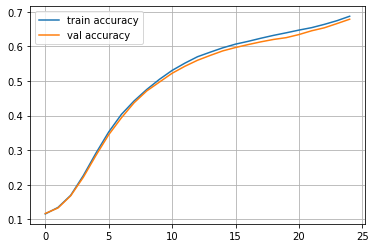

precision : 0.7253307426815829
recall : 0.668123730093669
f1 : 0.6321213391010684
accuracy : 0.6783
Confusion matrix: 
[[ 917    0   16    6    0    1   29    2    9    0]
 [   0 1041    1    3    1    0    5    2   69   13]
 [  41   48  635   86    4    0  134   22   51   11]
 [  24   14   33  863    0    0    7   25   27   17]
 [   2   13   43    3  239    0   90    3    6  583]
 [ 116   47   25  374   11   58   42   75  121   23]
 [  21   10   62    3    0    2  846    0   13    1]
 [   5   61   11    1    1    0    4  871   20   54]
 [  25   63   37  225    3    1   25   31  520   44]
 [  14   34   21   21   16    0   12   79   19  793]]
Some images with wrong predictions


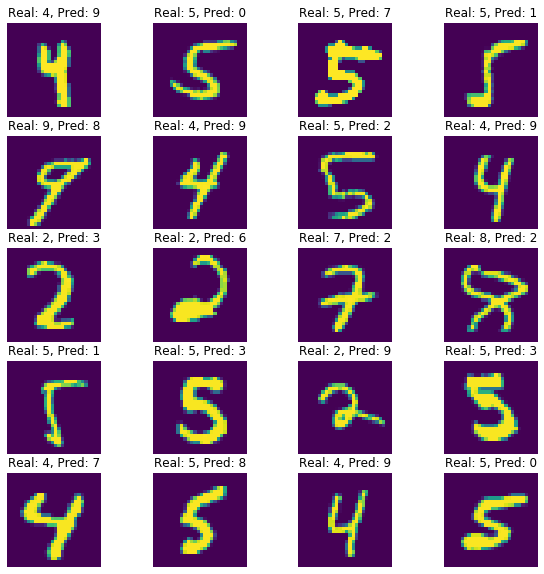

In [54]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Παρατηρούμε ότι με την παραπάνω εκπαίδευση του νευρωνικού δικτύου επιτύχαμε accuracy 0.69 και έναν σχετικά καλό confusion matrix με πιο μεγάλες τιμές στη διαγώνιο. Κατά την εκπαίδευση του δικτύου παρατηρήσαμε ότι τόσο το train όσο και το val accuracy αυξανόταν συνεχώς και με την πάροδο των εποχών το ένα προσέγγιζε όλο και περισσότερο το άλλο. Μάλιστα ακόμα και μετά τις 15 πρώτες επόχές το val accuracy συνέχισε να αυξανεται με αρκετά μεγάλο ρυθμό της τάξης του 0.02. Ωστόσο, παρατηρούμε ότι το accuracy που προέκυψε αποτελέι αύξουσα συνάρτηση στο χρόνο, οπότε και συμπαιρένουμε ότι το μοντέλο μας θα μπορούσε να συνεχίσει να "μαθαίνει", δίνοντας μας ακόμα καλύτερα αποτελέσματα. Για το σκοπό αυτό θα δοκιμάσουμε να εκπαιδεύσουμε το μοντέλο μας με περισσότερες εποχές (100 εποχές).

Epoch 99
Train accuracy: 0.8892
Val accuracy: 0.8913


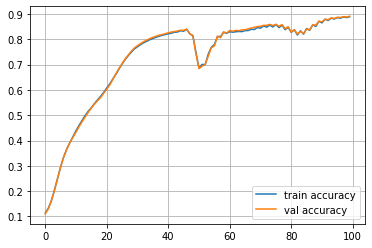

precision : 0.8903185927448238
recall : 0.8900913408248952
f1 : 0.8895729244651334
accuracy : 0.8913
Confusion matrix: 
[[ 948    0    3    2    0   11    8    1    7    0]
 [   0 1101    1    5    1    1    4    1   21    0]
 [  15   14  874   10   24    4   25   15   46    5]
 [   4    5   22  839    0   74    2   18   37    9]
 [   1    5    4    0  914    2   13    1    9   33]
 [  21    3   11   36   20  746   17    7   26    5]
 [  19    3   13    0   18   18  880    0    7    0]
 [   5   22   26    0    9    2    0  924    6   34]
 [   8    9   10   17   19   35   14    9  828   25]
 [  10    6    5    5   69   16    0   27   12  859]]
Some images with wrong predictions


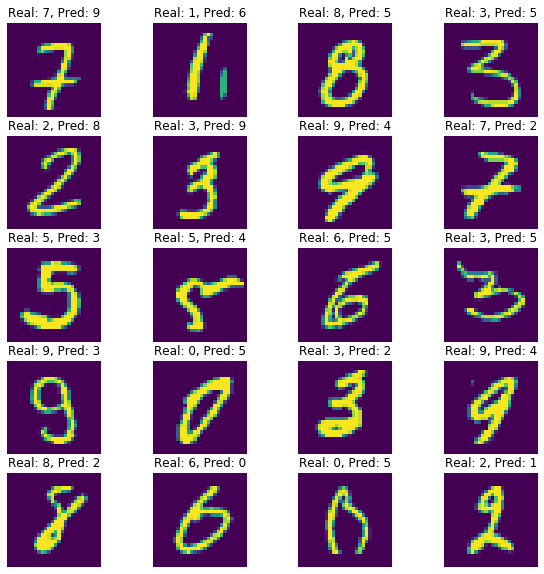

In [55]:
network = MLP([100, 200, 100, 10], 28*28)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(100):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Παρατηρούμε ότι το μοντέλο μας αύξησε το accuracy του σε 0.9. Η αύξηση αυτή όμως όπως παρατηρούμε δε συνέβει ομαλά ενώ το accuracy έπαψε να αποτελεί και γνωσίως αύξουσα συνάρτηση στο χρόνο. Οπότε, για το συγκεκριμένο μοντέλο παρατηρούμε ότι ο καλύτερος δυνατός αριθμός εποχών στον οποίο μπορούμε να το εκπαιδεύσουμε είναι γύρω στις 45 με 50 εποχές, όπου επιτυγχάνει μια αρκετά καλή τιμή val accuracy ~0.85. Από εκεί και μετά παρατηρούμε απότομες μεταβολές στο accuracy άρα και στη συνάρτηση σφάλματος του μοντέλου μας, η οποία μετά από το διάστημα αυτό θα εμφανίζει και αρκετές αυξήσεις, αντί να ελαχιστοποιείται όσο το δυνατόν περισσότερο. 

Η αστάθεια αυτή του μοντέλου μας πιθανώς να οφείλεται στον υψηλό ρυθμό εκμάθησης (learning rate = 0.1) με τον οποίο επιλέξαμε να το εκπαιδεύσουμε.Γενικά, ένας σχετικά υψηλό learning rate έχει ως αποτέλεσμα οι ενημερώσεις των βαρών να είναι αρκετά μεγάλες, οπότε και οι αποκλίσεις μεταξύ τους. Έτσι στη διάρκεια των εποχών εκπαίδευσης η απδοσή του πιθανόν να ταλαντευτεί λόγω των αποκλίσεων αυτών. Προκειμένου να αντιμετωπίσουμε το πρόβλημα αυτό και να σταθεροποιήσουμε την απόδοση του μοντέλου μας, τροποποιούμε λίγοτην κλάση MLP (όπως φαίνεται στο αντίστοιχο shell) έτσι ώστε να μπορούμε να επιλέγουμε κάθε φορά το ρυθμό εκμάθησης με τον οποίο θέλουμε να εκπαιδεύσουμε το μοντέλο μας. 

Παρακάτω επιλέγουμε να εκπαιδεύσουμε το μοντέλο μας με <b> learning rate = 0.05</b>, ενώ καθώς μειώνουμε το ρυθμό εμάθησης επιλέγουμε παράλληλα να αυξήσουμε και τις εποχές σε 200 για καλύτερα αποτελέσματα. 

Epoch 199
Train accuracy: 0.89105
Val accuracy: 0.8911


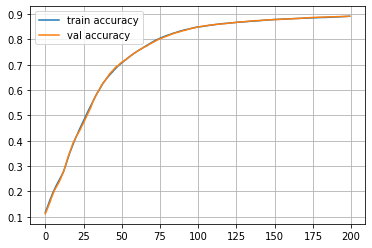

precision : 0.8893655449834151
recall : 0.8894006281166937
f1 : 0.8891467125136415
accuracy : 0.8911
Confusion matrix: 
[[ 953    0    6    0    0   10    6    1    4    0]
 [   0 1096    2    9    1    0    4    1   22    0]
 [  11   17  878   18   18    3   25   23   33    6]
 [   4    1   29  889    1   42    2   19   15    8]
 [   3    4    4    1  884    0   23    1    7   55]
 [  16    4    9   52   11  707   20   14   48   11]
 [  16    3    8    0   16   19  893    0    3    0]
 [   4   19   29    4   10    0    0  920    4   38]
 [   6    5    9   35   13   37   17   13  818   21]
 [   8    7   11   10   41   12    1   37    9  873]]
Some images with wrong predictions


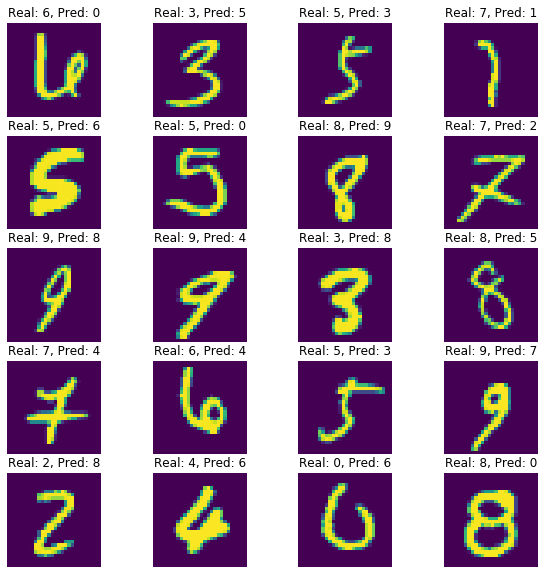

In [59]:
network = MLP([100, 200, 100, 10], 28*28, learning_rate = 0.05)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(200):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Παρατηρούμε λοιπόν ότι μειώνοντας το ρυθμό εκμάθησης τόσο το train όσο και το val accuracy ομαλοποιήθηκαν, ενώ καταφέραμε να αυξήσουμε και το accuracy σε 0.89 έχοντας παράλληλα ένα πολύ πιο σταθερό μοντέλο. Παράλληλα, παρατηρούμε ότι προς το τέλος της εκπαίδευσης το accuracy αρχίζει να σταθεροποιείται οπότε και βλέπουμε πως μάλλον έχουμε επιτύχει μια ικανοποιητική εκπαίδευση του μοντέλου μας.  

Γενικά, ο ρυθμός εκμάθησης εκφράζει την ταχύτητα με την οποία ένα σύστημα μαθαίνει. Οπότε, ένας υψηλός ρυθμός εκμάθησης βοηθάει στη γρήγορη και με μικρότερο υπολογιστικό κόστος εκπαίδευση του εκάστοτε μοντέλου, αλλά ωστόσο όπως είδαμε συνεπάγεται πολλές φορές και αστάθεια του μοντέλου μας λόγω αποκλίσεων στις τιμές των βαρών του και άρα και ταλαντώσεων της απόδοσής του κατά τη διάρκεια της εκπαιδευσής του. Βέβαια, και ένας πολύ μικρός ρυθμός εκμάθησης δε είναι απαραίτητα προτιμητέος. Αρχικά, ένας μικρότερος ρυθμός εκμάθησης απαιτεί πολύ μεγαλύτερο αριθμό εποχών εκπαίδευσης και άρα και πολύ περισσότερο χρόνο εκπαίδευσης. Εκτός όμως από αυτό ένας πολύ μικρός αριθμός εκμάθησης εγκυμονεί και μεγαλύτερο κίνδυνο στο να "κολλήσει" σε κάποιο τοπικό ελάχιστο της συνάρτησης σφάλματος οπότε και να μην προσεγγίσει ποτέ τη βέλτιστη λύση. Οπότε, για κάθε μοντέλο και για κάθε αρχιτεκτονική θα πρέπει κάθε φορά να επιλέγεται κατάλληλη <b>τιμή ρυθμού εκμάθησης</b> με σκοπό την ελαχιστοποίησει των προβλημάτων αυτών.  

Όσον αφορά τον <b>αριθμό των εποχών</b> που επιλέγουμε κάθε φορά για την εκπαίδευση του μοντέλου μας και εκεί θα πρέπει να δίνεται ιδιαίτερη προσοχή, καθώς μεγάλος αριθμός εποχών δεν εξασφαλίζει απαραίτητα και ένα πολύ καλά εκπαιδευμένο μοντέλο με πολύ υψηλό accuracy. Η υπερεκπαίδευση του μοντέλου μας πάνω σε ένα συγκεκριμένο train set μπορεί να επιφέρει αντίθετα αποτελέσματα από αυτά που επιθυμούμε, το λεγόμενο overfiting, κατά το οποίο το μοντέλο μας υπερπροσαρμόζεται στα δεδομένα εκπαίδευσης με αποτέλεσμα μετά να αδυναμεί να γενικεύσει τα αποτελέσματά του σε άλλα dataset. Σε ένα τέτοιο φαινόμενο το μοντέλο μας μετά την πάροδο κάποιων εποχών θα παρουσίαζε αύξηση του train accuracy με παράλληλη όμως μείωση του val accuracy. Στο παραπάνω μοντέλο που δημιουργήσαμε εμείς δεν παρατηρούμε κάποιο τέτοιο φαινόμενο οπότε και δεν έχουμε υπερεκπαιδεύσει το μοντέλο μας πάνω στο δοθέν dataset (με την επιφύλαξη ότι το test set είναι αρκετά μικρό και ίσως και αρκετά όμοιο με το train set).

Τέλος, θα δοκιμάσουμε και μια διαφορετική αρχιτεκτονική με τον ίδιο αριθμό επιπέδων αλλά αρκετά μεγαλύτερα σε μέγεθος. Θα εκπαιδεύσουμε λοιπόν ένα μοντέλο με 4 επίπεδα καθένα από τα οποία θα έχει μέγεθος 1000, 500, 200 και 10 αντίστοιχα.

Epoch 19
Train accuracy: 0.8238
Val accuracy: 0.8327


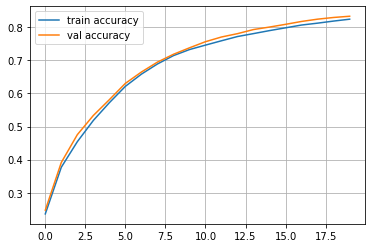

precision : 0.8343075309677349
recall : 0.8281840668592588
f1 : 0.8271668829391039
accuracy : 0.8327
Confusion matrix: 
[[ 937    0    7    3    1    7   17    1    7    0]
 [   0 1109    2    6    0    0    3    2   13    0]
 [  21   41  842   37   20    0   18   17   35    1]
 [   7   11   37  852    0   27    6   23   37   10]
 [   5    9    3    1  778    1   23    2   13  147]
 [  28   19   34  122   30  506   31   27   78   17]
 [  26    8   25    3   13   11  862    1    9    0]
 [   5   52   21    2   14    0    3  880   11   40]
 [  14   26   12   80   15   18   17   12  751   29]
 [  16   15    3   10  100   10    5   25   15  810]]
Some images with wrong predictions


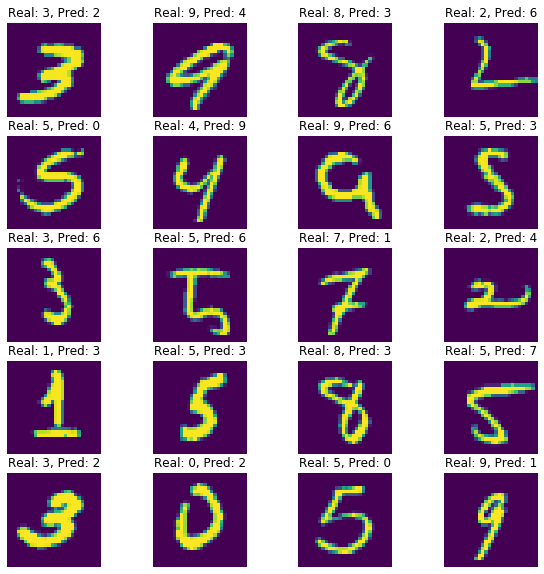

In [63]:
network = MLP([1000, 500, 200, 10], 28*28, learning_rate = 0.1)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(20):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Παρατηρούμε ότι η εκπαίδευση του μοντέλου αυτού καθυστερεί αρκετά παρότι επιλέχθηκαν μόνο 20 εποχές, γεγονός βέβαια που δικαιολογεί η μεγάλη πολυπλοκότητά του. Παράλληλα βέβαια παρατηρούμε ότι ακόμα και με το μικρό αυτό αριθμό εποχών κατάφερε να επιτύχει ένα ικανοποιητικό accuracy με τιμή της τάξης του 0.8 (υπάρχει περίπτωση βέβαια το μοντέλο αυτό όπως και πριν λόγω του υψηλού learning rate να μην είναι απόλυτα ευσταθές). Γενικά, η επιλογή πολύπλοκων αρχιτεκτονικών δε συνεπάγεται πάντα καλύτερα αποτελέσματα, τόσο λόγω των χρονικών απιατήσεων που αυτή προσδίδει όσο και λόγω προβλημάτων overfiting που αυτή μπορεί να εισάγει σε περιπτώσεις που χρησιμοποιούμε πολύ περισσότερες υπερπαραμέτρους από αυτές που πραγματικά χρειάζονται για να περιγράψουμε ένα πιο απλό πρόβλημα.     

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [66]:
from sklearn.neural_network import MLPClassifier

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.9664531603115327
recall : 0.9662404620750692
f1 : 0.9662965838611131
accuracy : 0.9666
Confusion matrix: 
[[ 961    0    2    2    2    2    7    1    1    2]
 [   0 1122    5    0    0    0    3    2    3    0]
 [   1    1  987   17    2    0    4   13    7    0]
 [   1    1    6  970    2    9    0    6   10    5]
 [   0    0    4    1  947    1    4    5    1   19]
 [   4    0    1    4    1  860    7    4    7    4]
 [   6    3    3    1    6   10  926    2    1    0]
 [   0    1    6    0    0    0    1 1003    1   16]
 [   3    2    6   13    4    8    3   10  914   11]
 [   2    4    0    7    9    4    0    5    2  976]]
Some images with wrong predictions
Wall time: 38 s


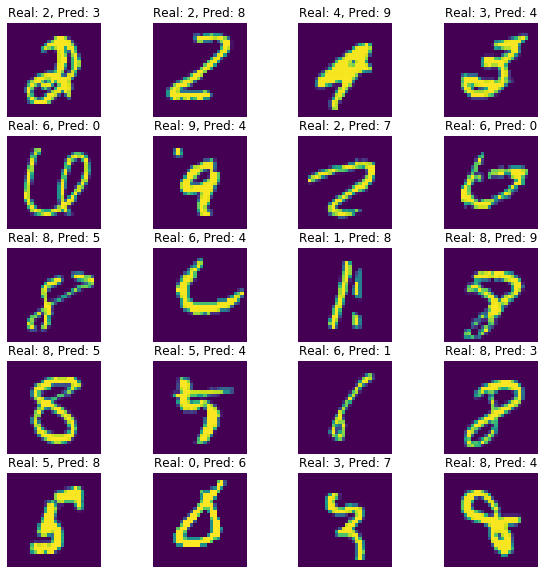

In [67]:
%%time

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

## Σύγκριση υλοποιήσεων 

Η έτοιμη υλοποίηση πετυχαίνει ένα πολύ καλό accuracy 0.97 με μόλις 25 εποχές εκπαίδευσης, συγκριτικά με τις δικές μας υλοποιήσεις οι οποίες προκειμένου να πετύχουν υψηλά accuracy απαιτούν αρκετές παραπάνω εποχές εκπαίδευσης, οπότε και χρόνο εκπαίδευσης. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσμα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 

# Αξιολόγηση- Συμπεράσματα 

Παρατηρούμε ότι στο συγκεκριμένο πρόβλημα με το συγκεκριμένο dataset οι βέλτιστες τεχνικές ταξινόμησης των εικόνων είναι ο ταξινομητής ΚΝΝ και το MLP με το MLP ίσως να προτιμάται λόγω του αρκετά μειωμένου χρόνου στον οποίο επιτυγχάνει την ταξινόμηση μιας εικόνας. Το MLP μπορεί να απαιτεί αρκετό χρόνο κατά τη διαδικασία εκπαίδευσής του, αλλά στη συνέχεια όταν πλέον θα χρησιμοποιηθεί για την ταξινόμηση των εικόνων ο χρόνος που απαιτεί προκειμένου να ταξινομήσει μια εικόνα είναι κατά πολύ μικρότερος από το χρόνο που απαιτεί ο ΚΝΝ, ιδίως για μεγάλα datasets. Το γεγονός οτι ο απλός ΚΝΝ διατρέχει κάθε φορά το σύνολο του dataet για να ταξινομήσει μια εικόνα κάνει την επιλογή αυτού στο πρόβλημα της ταξινόμησης αρκετά δύσκολη ιδίως για μεγάλα dataset όπου οι χρονικές απαιτήσεις του μπορούν να γίνουν απαγορευτικές. 
Βέβαια, έχουν προταθεί και χρησιμοποιούνται αρκετές βελτιστοποιήσεις αυτού που μειώνουν αρκετά την χρονική πολυπλοκότητά του. Όμοιες βελτιστοποιήσεις βέβαια υπάρχουν και για τα νευρωνικά δίκτυα, όπου το πλήθος των αρχιτεκτονικών που μπορείς να χρησιμοποιήσεις, οι τιμές των υπερπαραμέτρων πυο θα επιλέξεις, ο τρόπος με τον οποίο θα τα εκπαιδεύσεις, οι optimizers που τυχόν μπορείς να χρησιμοποιήσεις και πολλά ακόμα τα καθιστούν ισχυρά εργαλεία για μια πολύ καλή αντιμετώπιση πολύ ακριβή προσέγγιση πολλών σύγχρονων πολύπλοκων προβλημάτων.    